# 6.6 Analyzing Time Series Data

# Outline of Contents

## 1. Import Libraries and Data

## 2. Prepare data

## 3. Create a line chart

## 4. Decompose the data’s components.
 
## 5. Dickey-Fuller test for stationarity

## 6. Differencing Data & Autocorrelation


# Bonus Task

## 1. Defining Parameters
## 2. Splitting Data
## 3. Fitting the ARIMA Model
## 4. Model Iterations

# 1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import quandl
import warnings # This is a library that handles warnings.
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models. Not sure if needed

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

#import pylab as pl

In [3]:
# Set the option to display graphs within the notebook.

%matplotlib inline

In [4]:
#Define file path

path = r'C:\Users\Caroline\Documents\Career Foundry\06 2023 EVCS washington state'

In [5]:
# Import data

df_present = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present_cluster.pkl'))
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_hist.pkl'))

In [6]:
#Check data and clean
df.shape

(3203, 17)

(3203, 17)

In [7]:
df_present.shape

(1902, 26)

(1902, 26)

In [8]:
#Visual check of df
df.head()

,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
0,2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
1,2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.00010,0.864083
2,2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.00020,0.860739
3,2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.00030,0.859150
4,2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.00025,0.859605


,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
0,2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
1,2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.00010,0.864083
2,2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.00020,0.860739
3,2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.00030,0.859150
4,2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.00025,0.859605


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3203 non-null   datetime64[ns]
 1   County                     3203 non-null   object        
 2   BEV Registered             3203 non-null   int32         
 3   PHEV Registerd             3203 non-null   int32         
 4   EV Total                   3203 non-null   int32         
 5   Non-EV Total               3203 non-null   int32         
 6   Total Vehicles             3203 non-null   int32         
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3203 non-null   int32         
 10  Month                      3203 non-null   int32         
 11  Station Count              3203 non-null   int32         
 12  Cum_CS

In [10]:
# Check for missing values

df.isnull().sum()

Date                           0
County                         0
BEV Registered                 0
PHEV Registerd                 0
EV Total                       0
Non-EV Total                   0
Total Vehicles                 0
BEV %                        200
Overall EV %                 200
Year                           0
Month                          0
Station Count                  0
Cum_CS_count                   0
Cumulative EVCS WA             0
Estimated Population           0
EVs per person               200
Total Vehicles per person    200
dtype: int64

Date                           0
County                         0
BEV Registered                 0
PHEV Registerd                 0
EV Total                       0
Non-EV Total                   0
Total Vehicles                 0
BEV %                        200
Overall EV %                 200
Year                           0
Month                          0
Station Count                  0
Cum_CS_count                   0
Cumulative EVCS WA             0
Estimated Population           0
EVs per person               200
Total Vehicles per person    200
dtype: int64

# 2. Prepare data

In [12]:
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Set the Date column as the index
df.set_index('Date', inplace=True)

In [14]:
# Check the dataframe
df.head()

,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
Date,,,,,,,,,,,,,,,,
2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.00010,0.864083
2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.00020,0.860739
2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.00030,0.859150
2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.00025,0.859605


,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
Date,,,,,,,,,,,,,,,,
2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.00010,0.864083
2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.00020,0.860739
2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.00030,0.859150
2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.00025,0.859605


In [15]:
# Drop rows with any NaN values since I know these are from a merge in 6.2.1 and are dates before 2017 and after 05/2023
df = df.dropna()

In [16]:
df.shape

(3003, 16)

(3003, 16)

# 3. Create a linechart

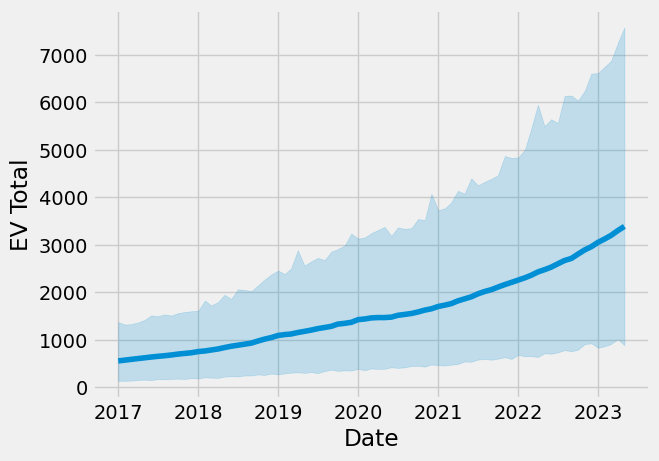

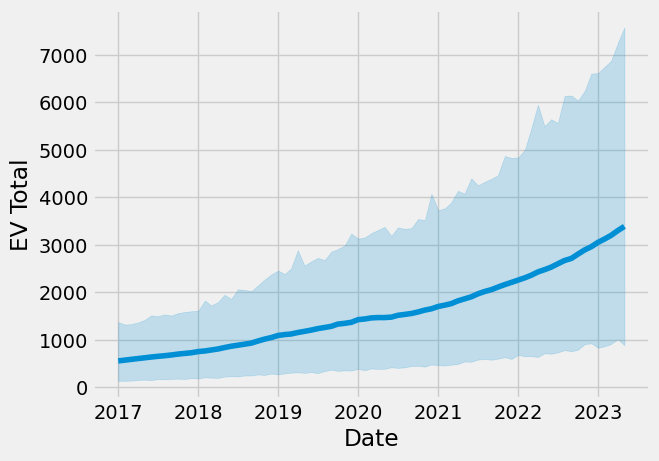

In [17]:
# Create a linechart of the average EV Total per county

line = sns.lineplot(data = df, x = 'Date',y = 'EV Total')

# 4. Decompose the data 

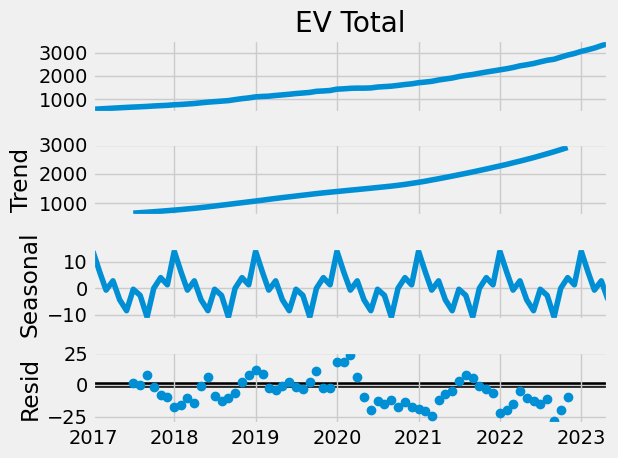

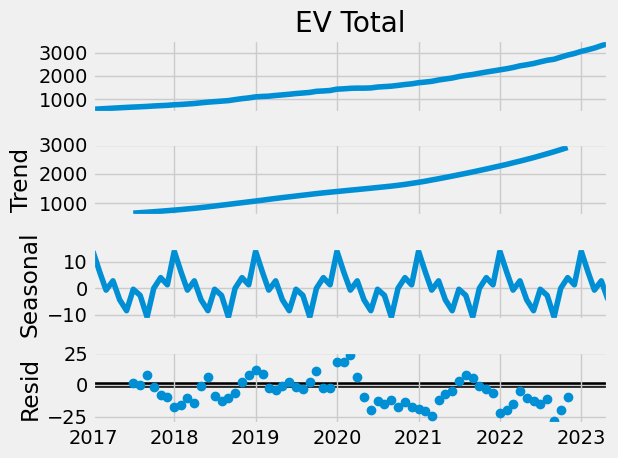

In [18]:
# Calculate the average Washington State EV Total for each date
average_df = df.groupby('Date')['EV Total'].mean().reset_index()

# Set the 'Date' column as the index
average_df.set_index('Date', inplace=True)

# Perform decomposition on the 'EV Total' column of the average_df
decomposition_avg = sm.tsa.seasonal_decompose(average_df['EV Total'], model='additive')

# Plot the decomposed components
decomposition_avg.plot();

Decomposition - the overall trend of the average total EV per county is a positive upwards trendline suggesting there is a growing adoption of EV. The data does exhibit a seasonal pattern with regular peaks each year around December possibly due to year-end sales by dealers. The residual points indicate some variation not explained by the trend and the seasonal variation. The negative points after March 2020 to mid 2021 are likely due to the effects of the COVID-19 pandemic and lockdown related procedures. The low residuals after mid-2021 may be due to supply-chain shortages. The residual fluctuations could be also be attributed to other external factors and/or random noise in the data.

# 5. Dickey-Fuller test for stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(average_df['EV Total'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.492191
p-value                         0.999047
Number of Lags Used             3.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64
Dickey-Fuller Stationarity test:
Test Statistic                  2.492191
p-value                         0.999047
Number of Lags Used             3.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


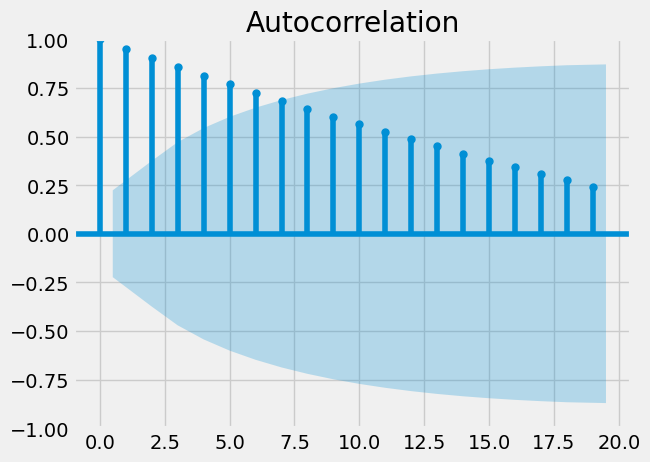

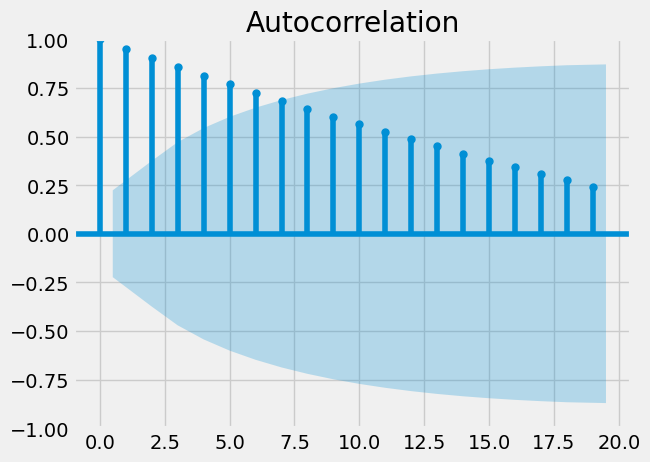

In [20]:
# Check out a plot of autocorrelations

# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(average_df)
plt.show()

The null hypothesis of the Dickey-Fueller test is that the time series data is non-stationary and has a trend. Since the test statistic is (2.49) is greater than all the common signifigance levels indicates that I cannont reject the null hypothesis. To further support this conclusion the p-value (0.999) is larger then the significance level of 0.05 indicating more evidence to support the null hypothesis. The data will have to be differenced before it is stationary and can be used for models that require stationary data.

# 6. Differencing Data & Autocorrelation

In [21]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = average_df - average_df.shift(1)

In [22]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [23]:
data_diff.head()

,EV Total
Date,
2017-02-01,17.307692
2017-03-01,15.179487
2017-04-01,17.384615
2017-05-01,15.641026
2017-06-01,16.769231


,EV Total
Date,
2017-02-01,17.307692
2017-03-01,15.179487
2017-04-01,17.384615
2017-05-01,15.641026
2017-06-01,16.769231


In [24]:
data_diff.columns

Index(['EV Total'], dtype='object')

Index(['EV Total'], dtype='object')

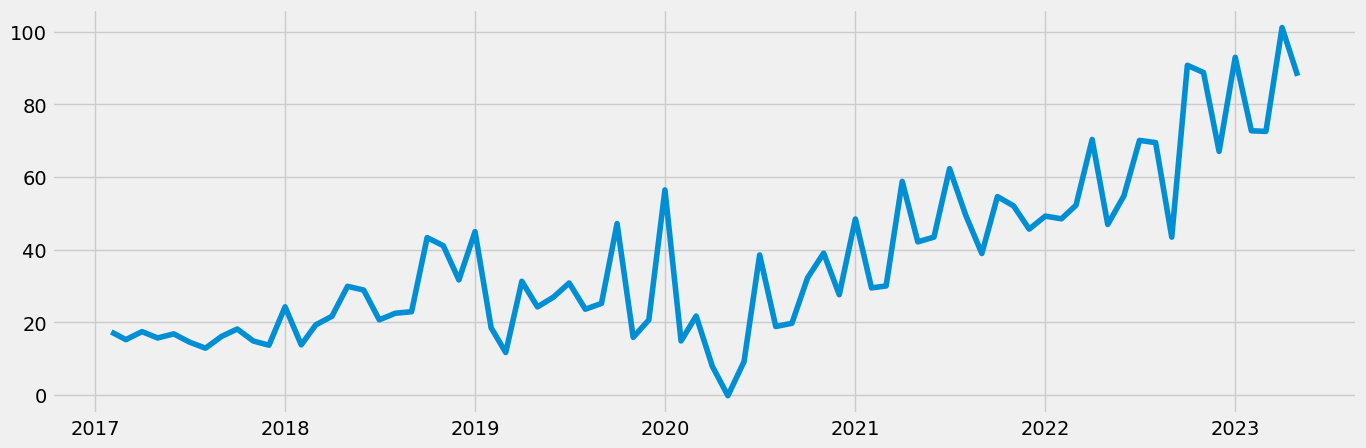

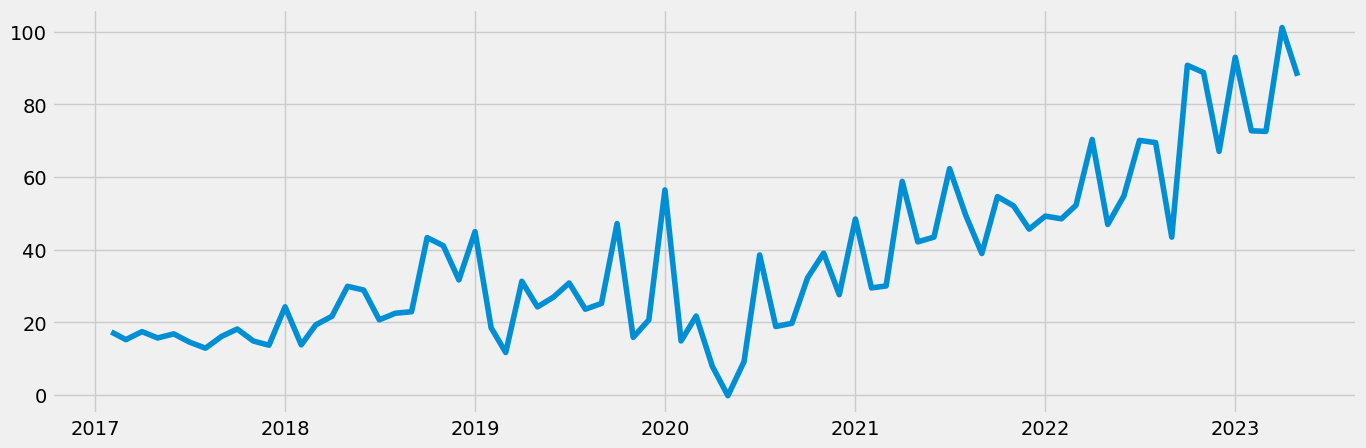

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
#Conduct another round of the Dicky-Fuller test to check for stationarity
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.945196
p-value                         0.993653
Number of Lags Used             5.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64
Dickey-Fuller Stationarity test:
Test Statistic                  0.945196
p-value                         0.993653
Number of Lags Used             5.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


The test statistic is still greater than the critical values for the commmon significance levels indicating that I cannont reject the null hypothesis. The p-value (0.99) is still greater than 0.05

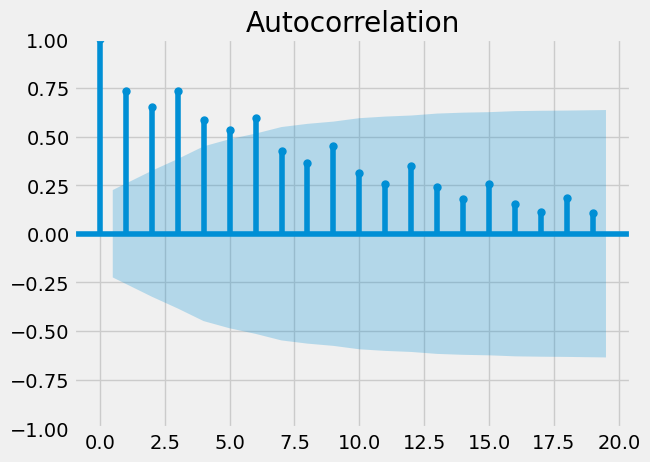

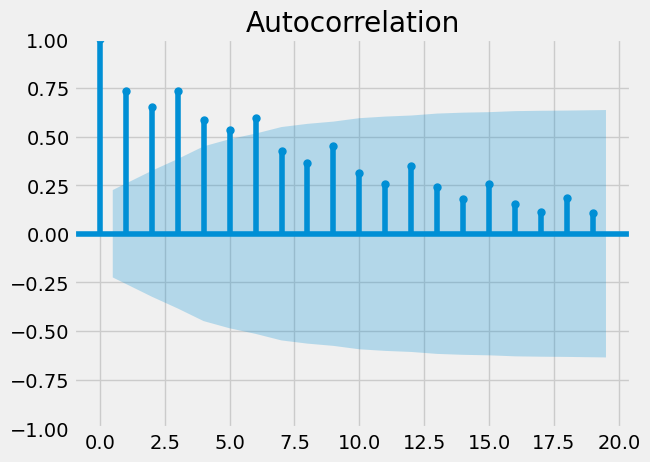

In [27]:
#Autocorrelation graph just to see
plot_acf(data_diff)
plt.show()

In [28]:
#Round 2 

In [29]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff2 = data_diff - data_diff.shift(1)

In [30]:
data_diff2.dropna(inplace = True)

In [31]:
data_diff2.head()

,EV Total
Date,
2017-03-01,-2.128205
2017-04-01,2.205128
2017-05-01,-1.743590
2017-06-01,1.128205
2017-07-01,-2.256410


,EV Total
Date,
2017-03-01,-2.128205
2017-04-01,2.205128
2017-05-01,-1.743590
2017-06-01,1.128205
2017-07-01,-2.256410


In [32]:
data_diff2.columns

Index(['EV Total'], dtype='object')

Index(['EV Total'], dtype='object')

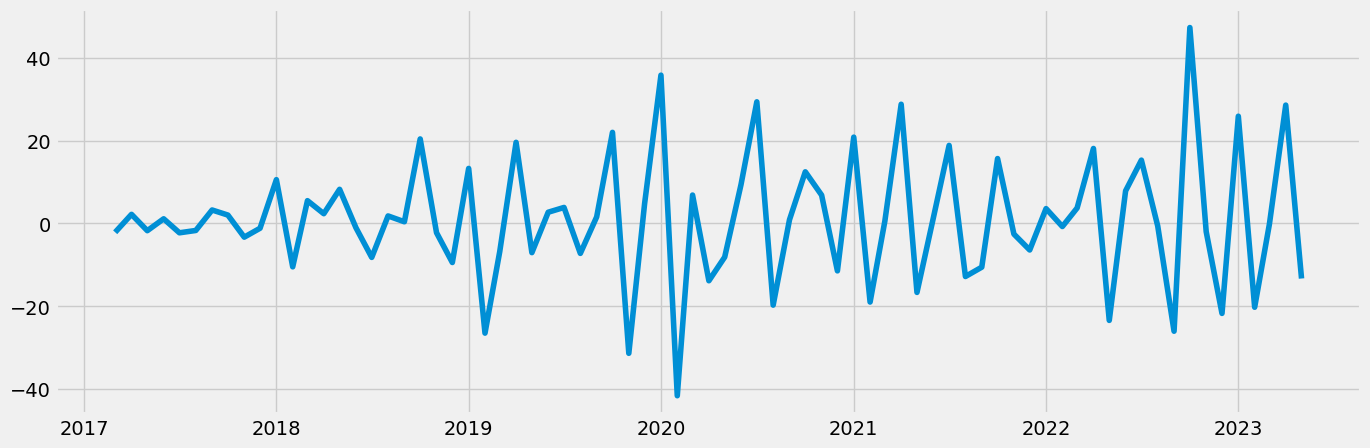

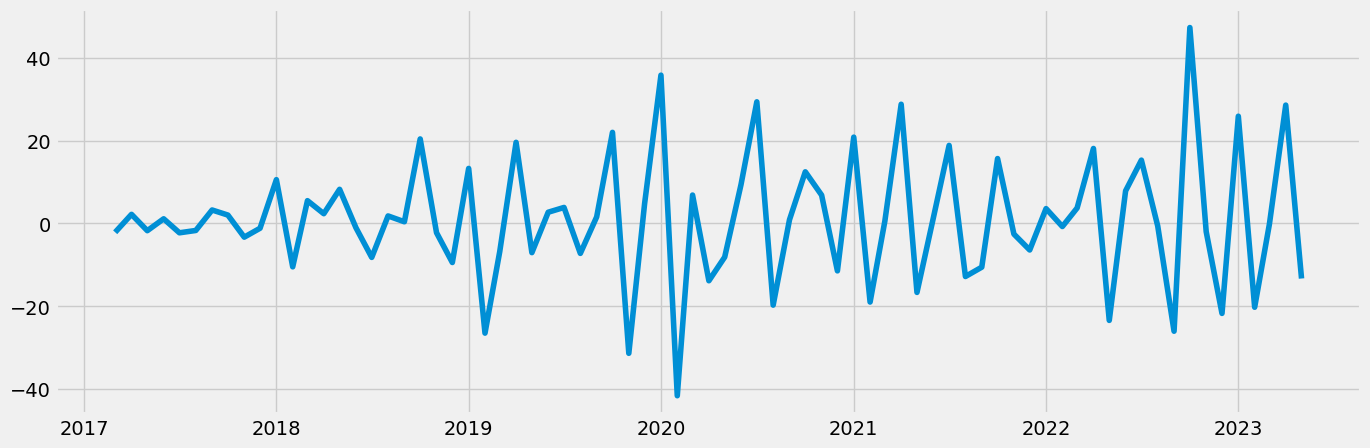

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [34]:
#Conduct a third round of the Dicky-Fuller test to check for stationarity
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.430131e+01
p-value                        1.227735e-26
Number of Lags Used            1.000000e+00
Number of Observations Used    7.300000e+01
Critical Value (1%)           -3.523284e+00
Critical Value (5%)           -2.902031e+00
Critical Value (10%)          -2.588371e+00
dtype: float64
Dickey-Fuller Stationarity test:
Test Statistic                -1.430131e+01
p-value                        1.227735e-26
Number of Lags Used            1.000000e+00
Number of Observations Used    7.300000e+01
Critical Value (1%)           -3.523284e+00
Critical Value (5%)           -2.902031e+00
Critical Value (10%)          -2.588371e+00
dtype: float64


The test statistic (-1.43) is less than all of the Critical Values (10%, 5%, and 1%), giving me strong evidence to reject the null hypothesis and I can infer that the time series is stationary. Further evidence to reject the null hypothesis is provided by the p-value, which is less than 0.05.

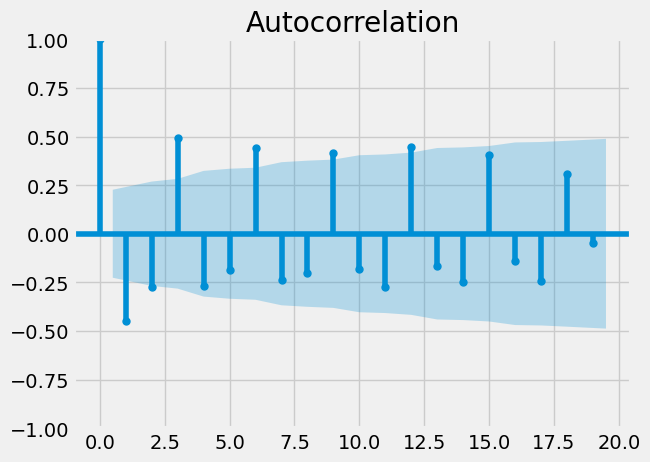

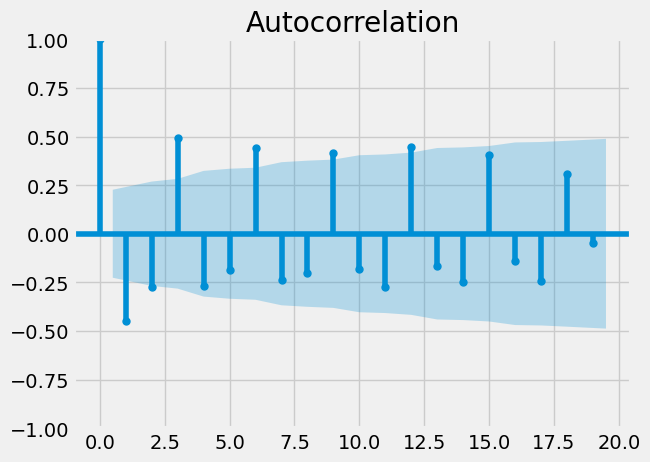

In [35]:
# Checking the Autocorrelation graph
plot_acf(data_diff2)
plt.show()

# Bonus Task

## 1. Defining your Parameters

In [36]:
#For forecasting EV Total data with ARIMA 

#Parameter d=2 since there was 2 rounds of differencing to achieve stationarity

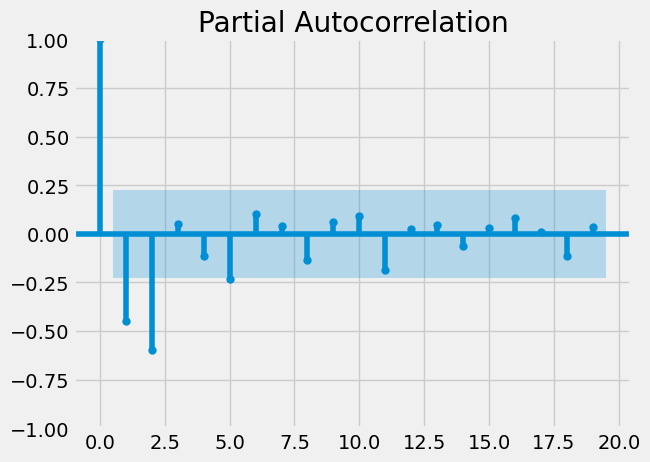

<Figure size 4500x4500 with 0 Axes>

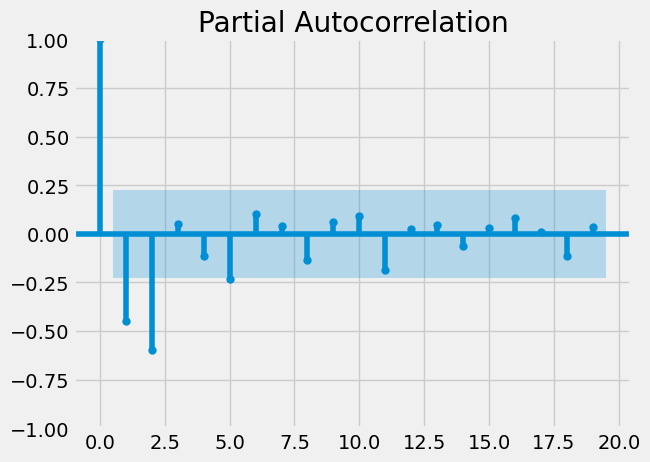

<Figure size 4500x4500 with 0 Axes>

In [37]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff2)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

0 is a highly positive bar which indicates positive correlation. However this is to be expected since the graph starts at 0 and it is highly likely to correlate with itself. The large negatives at 1 and 2 suggest negative correlation at lags 1 and 2. 1 or 2 are good initial parameters for p.

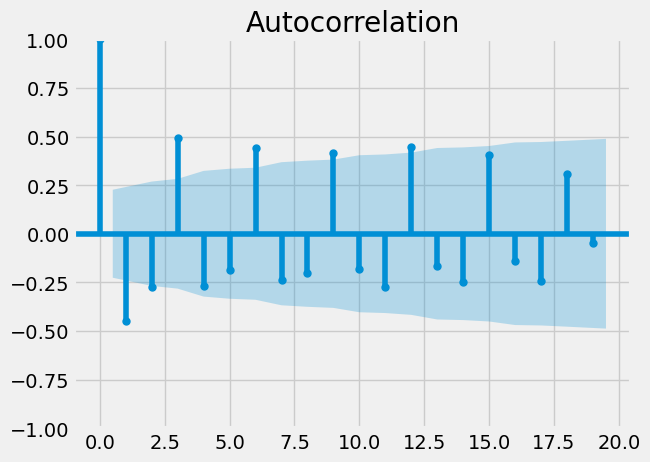

<Figure size 1500x500 with 0 Axes>

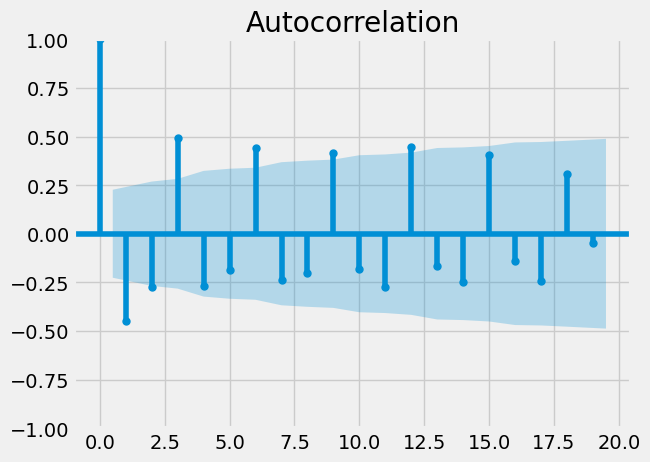

<Figure size 1500x500 with 0 Axes>

In [38]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff2)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

There are 7 autocorrelations that exceed the blue area. This suggests that there may be 7 significant lagged observations that are affecting the current observation. Will try starting with q = 3 and iterate the model.

## 2. Splitting the Data

In [39]:
# Split the data

# Determine the split index based on the 70:30 ratio
split_index = int(len(data_diff2) * 0.7)

# Get the dates corresponding to the split index
split_date = data_diff2.index[split_index]

In [40]:
split_date

Timestamp('2021-07-01 00:00:00')

Timestamp('2021-07-01 00:00:00')

In [41]:
#Split into train and test data
train = data_diff2['EV Total'][:split_index]
test = data_diff2['EV Total'][split_index:]

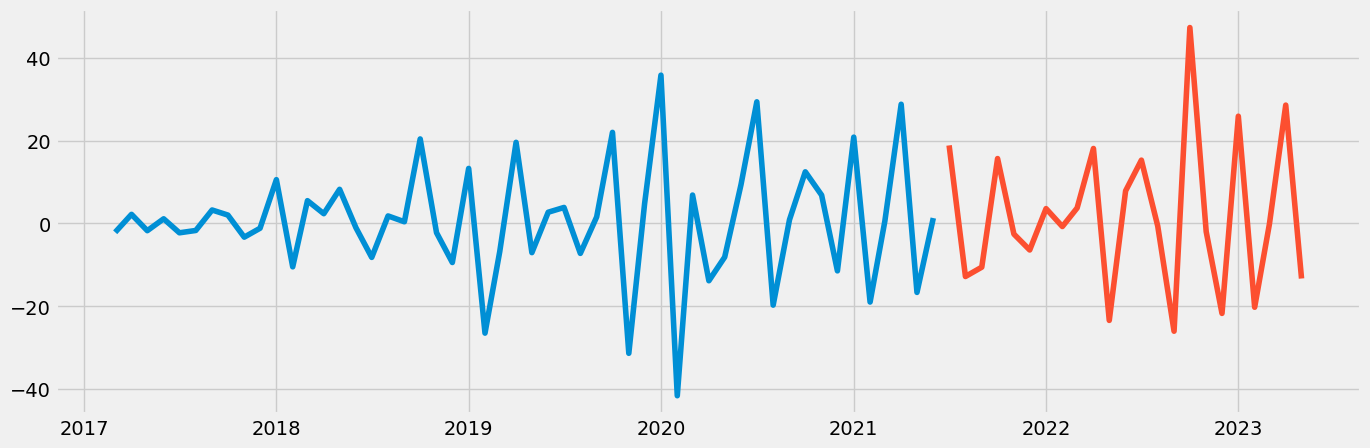

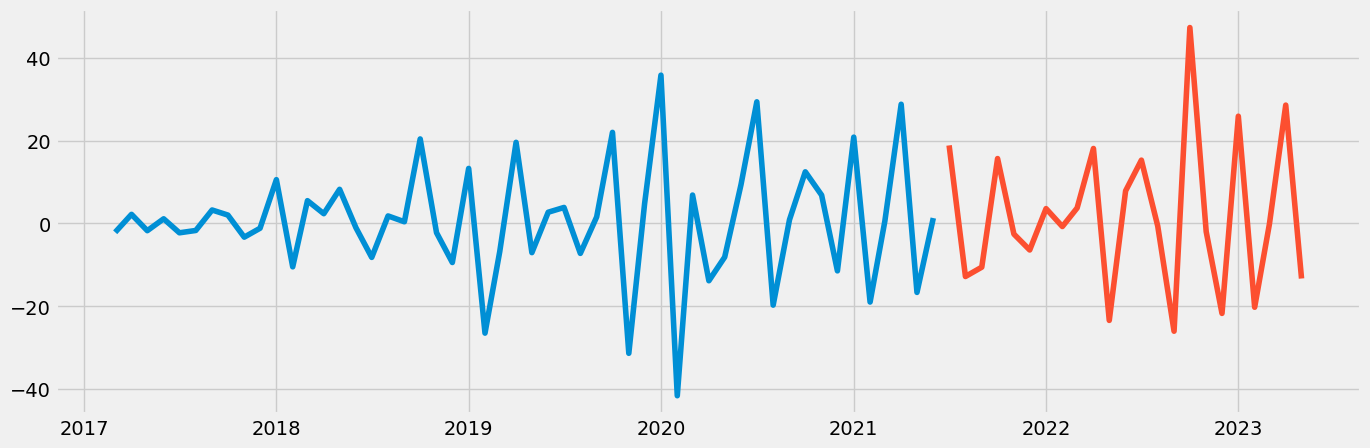

In [42]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [43]:
test.shape

(23,)

(23,)

## 3. Running and Fitting the Model

In [44]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -203.258
Date:                Tue, 15 Aug 2023   AIC                            414.515
Time:                        17:24:16   BIC                            422.163
Sample:                    03-01-2017   HQIC                           417.428
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.6685      0.184    -14.542      0.000      -3.028      -2.309
ma.L2          2.3402      0.327      7.152      0.000       1.699       2.981
ma.L3         -0.6717      0.151     -4.436      0.0

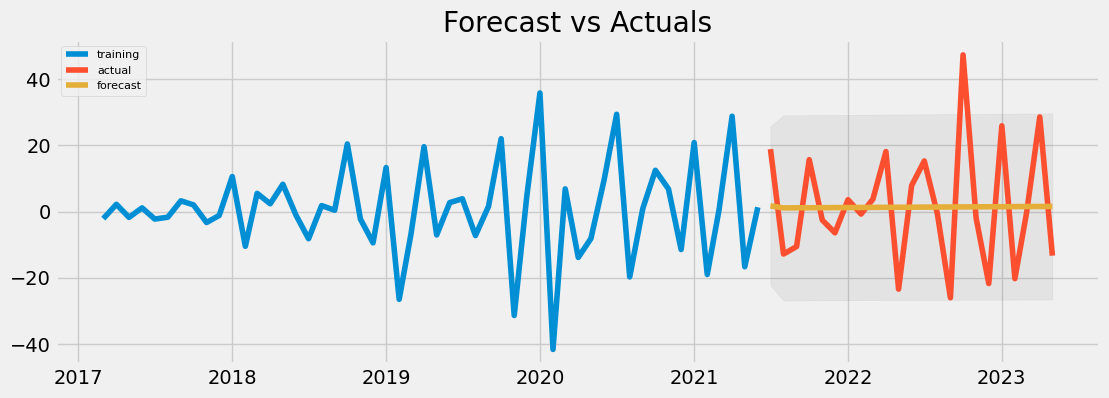

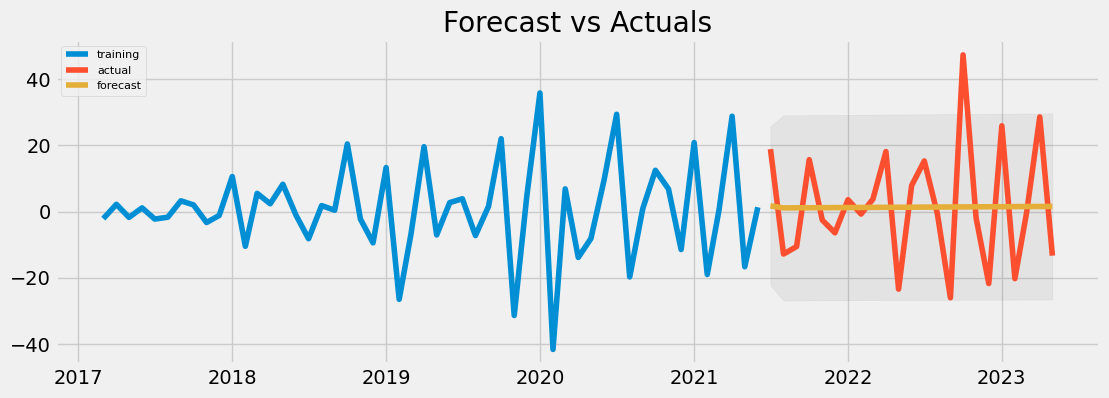

In [45]:
#Iteration 1 - running the ARIMA model
#the older version of library used to return a tuple with forecast, std error, and confidence intervals, current does not
model = ARIMA(train, order=(0, 2, 3))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


- The forecast is largely within the confidence intervals and the coefficients are statistically significant (p <= 0.05), however the forecast line does not overlap with the actual line.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -203.267
Date:                Tue, 15 Aug 2023   AIC                            416.533
Time:                        17:24:18   BIC                            426.094
Sample:                    03-01-2017   HQIC                           420.174
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2774      0.181      1.535      0.125      -0.077       0.632
ma.L1         -2.9255    181.565     -0.016      0.987    -358.786     352.935
ma.L2          2.9249    369.965      0.008      0.9

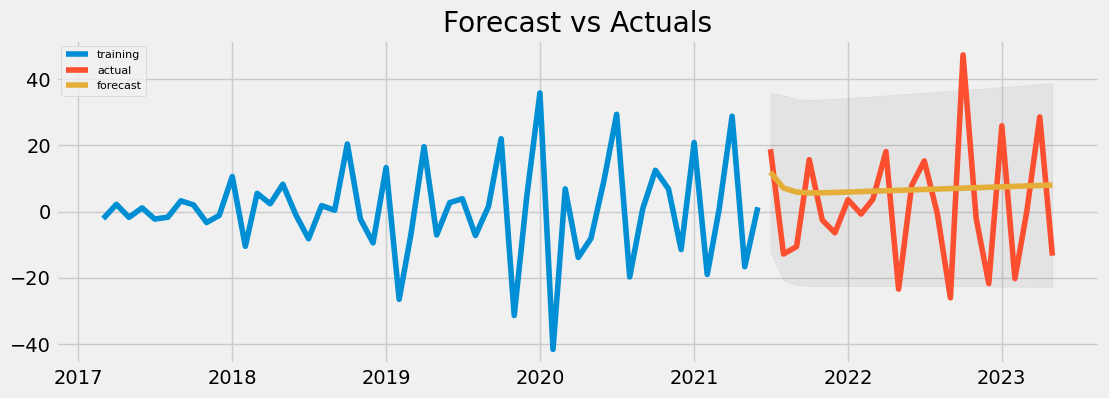

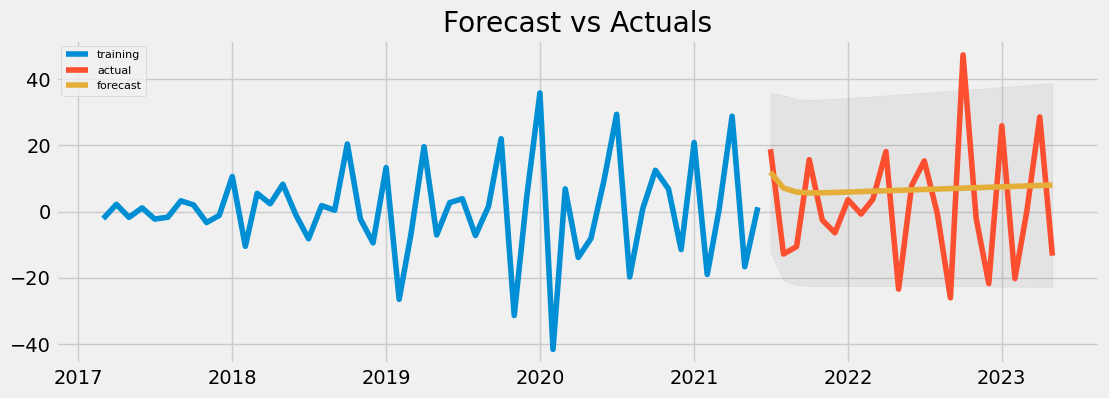

In [46]:
# Iteration 2 - change the p value
model = ARIMA(train, order=(1, 2, 3))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


- The coefficients are not statistically significant (p > 0.05) and the forecast line does not overlap with the actual line.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -200.468
Date:                Tue, 15 Aug 2023   AIC                            412.937
Time:                        17:24:20   BIC                            424.409
Sample:                    03-01-2017   HQIC                           417.305
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8084      0.299     -2.707      0.007      -1.394      -0.223
ar.L2         -0.5468      0.122     -4.492      0.000      -0.785      -0.308
ma.L1         -1.7449     12.028     -0.145      0.8

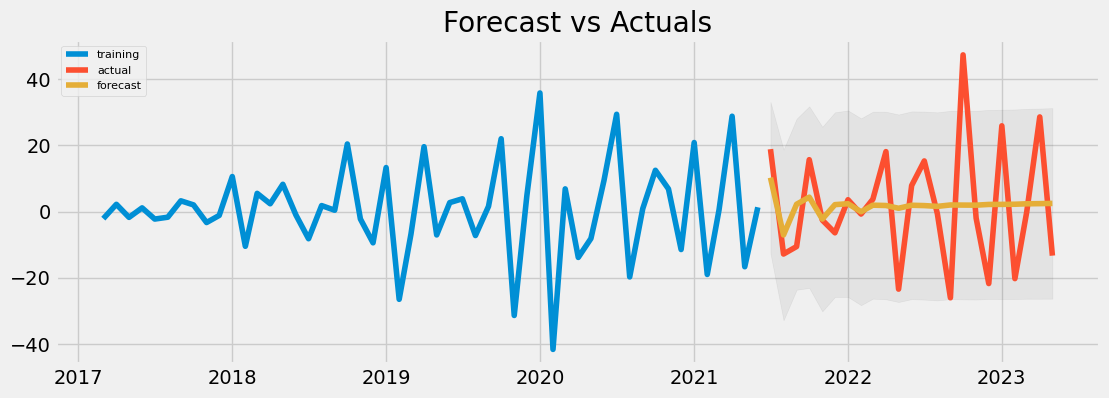

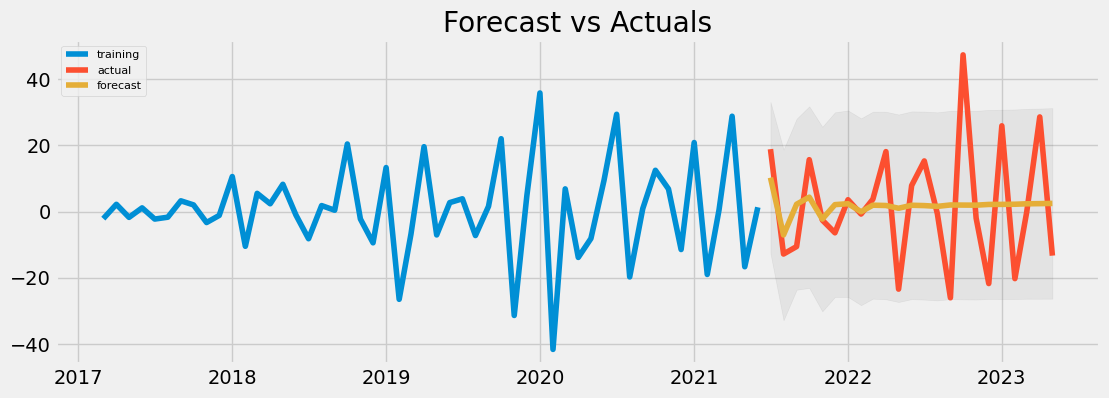

In [47]:
# Iteration 3 - change the p value
model = ARIMA(train, order=(2, 2, 3))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- The forecast is largely within the confidence intervals. ar.L1 and ar.L2 are statistically significant and the forecast line overlaps more with the actual values, will try altering the q parameter as the ma values are not statistically significant.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -196.941
Date:                Tue, 15 Aug 2023   AIC                            407.881
Time:                        17:24:21   BIC                            421.265
Sample:                    03-01-2017   HQIC                           412.978
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9090      0.090    -10.150      0.000      -1.085      -0.733
ar.L2         -0.9630      0.073    -13.151      0.000      -1.107      -0.819
ma.L1         -1.3003      2.214     -0.587      0.5

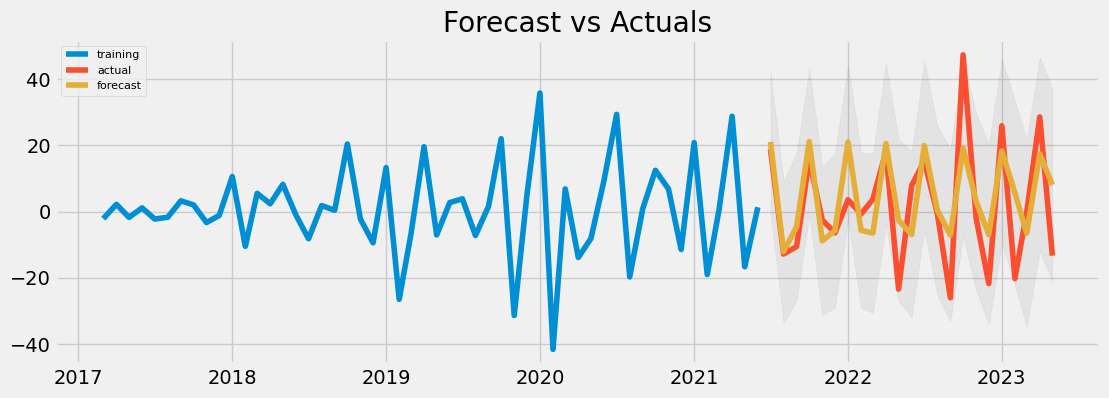

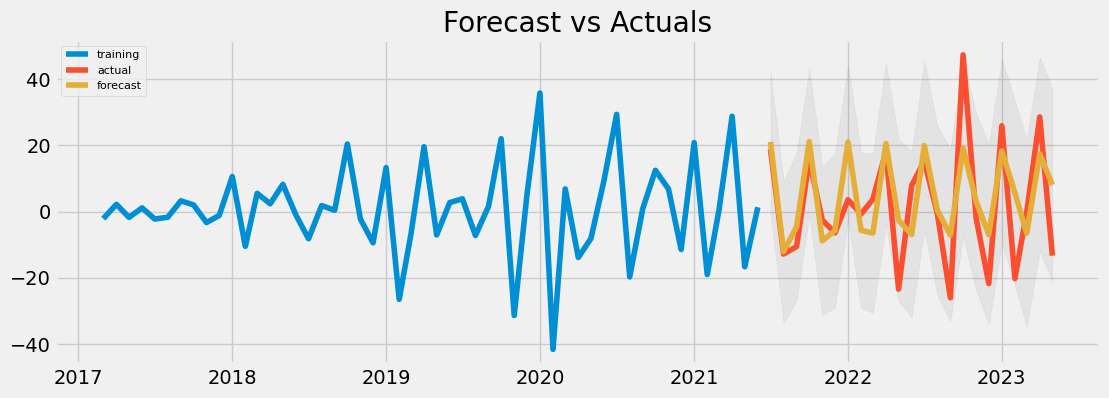

In [48]:
# Iteration 4 - change the q value
model = ARIMA(train, order=(2, 2, 4))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

 - The ar.L1 and ar.L2 variables remain statistically significant but the ma values are not statistically significant and may not be necessary, however there is much improved overlap between the forecast and the actual data.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -200.868
Date:                Tue, 15 Aug 2023   AIC                            411.737
Time:                        17:24:31   BIC                            421.297
Sample:                    03-01-2017   HQIC                           415.377
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6276      0.161     -3.896      0.000      -0.943      -0.312
ar.L2         -0.4733      0.096     -4.916      0.000      -0.662      -0.285
ma.L1         -1.9950     33.111     -0.060      0.9

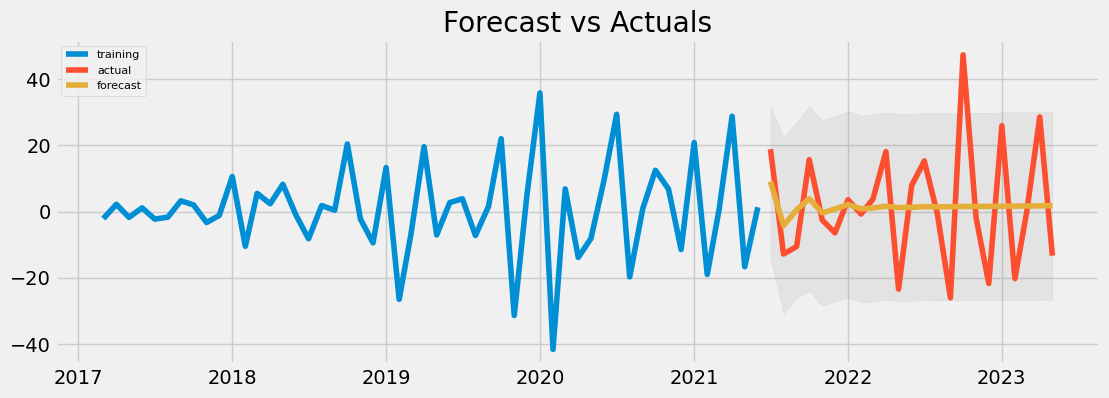

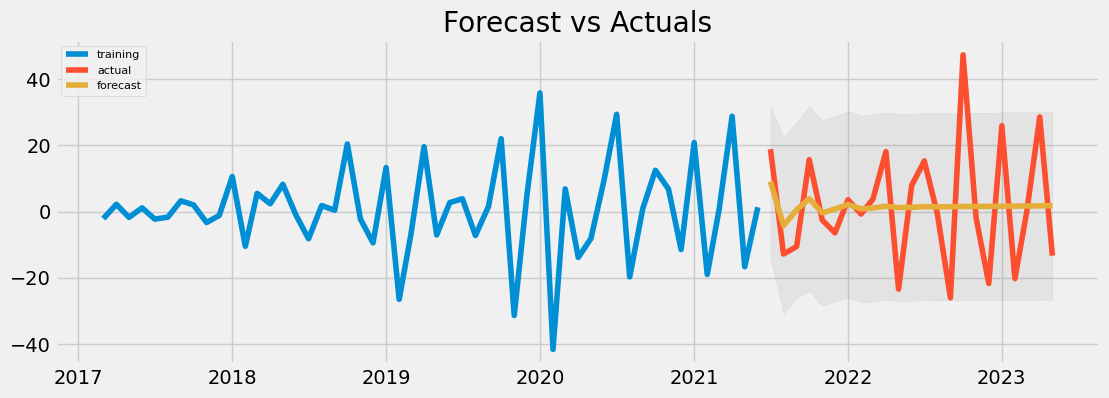

In [49]:
# Iteration 5 - change the q value
model = ARIMA(train, order=(2, 2, 2))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- Not an improvement to the model.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -202.161
Date:                Tue, 15 Aug 2023   AIC                            420.323
Time:                        17:24:36   BIC                            435.619
Sample:                    03-01-2017   HQIC                           426.148
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7677      0.202      3.795      0.000       0.371       1.164
ar.L2         -0.8644      0.300     -2.880      0.004      -1.453      -0.276
ma.L1         -3.4521      2.287     -1.509      0.1

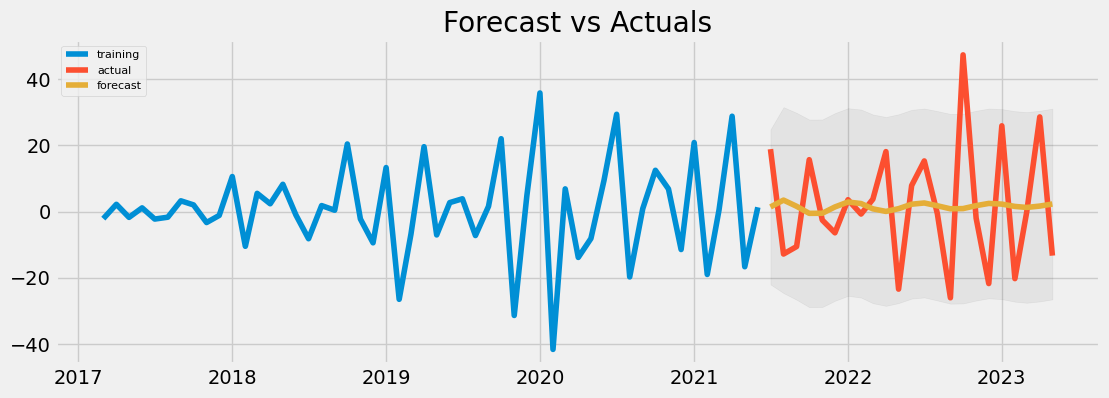

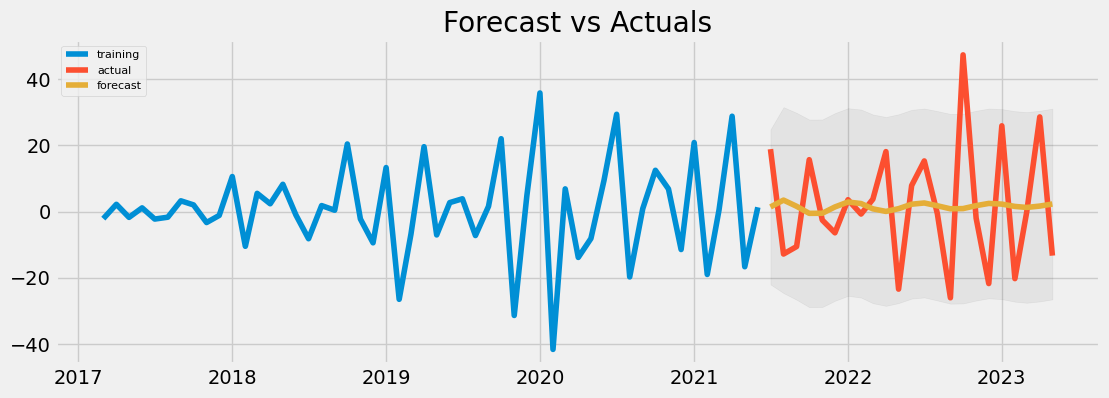

In [50]:
# Iteration 6 - change the q value
model = ARIMA(train, order=(2, 2, 5))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- Not an improvment to the model

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 6)   Log Likelihood                -201.767
Date:                Tue, 15 Aug 2023   AIC                            421.533
Time:                        17:24:38   BIC                            438.742
Sample:                    03-01-2017   HQIC                           428.086
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6624      0.279     -5.963      0.000      -2.209      -1.116
ar.L2         -0.8080      0.348     -2.320      0.020      -1.491      -0.125
ma.L1         -0.8977     18.804     -0.048      0.9

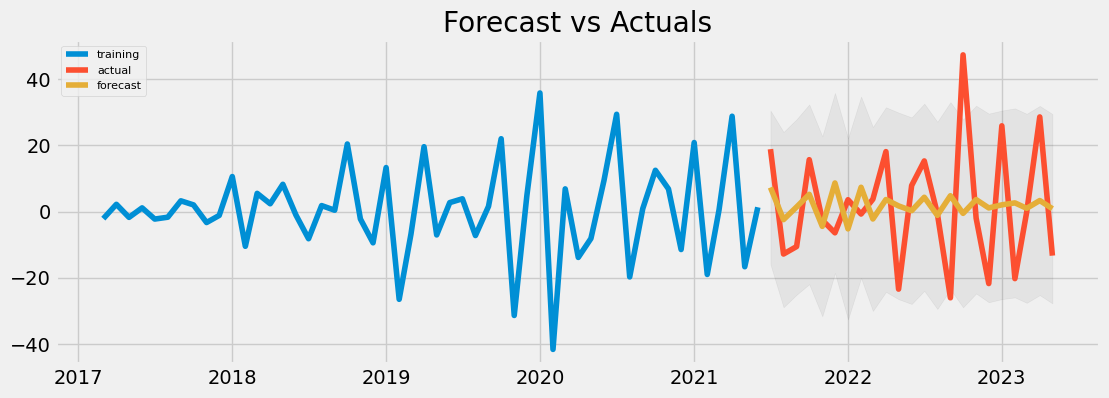

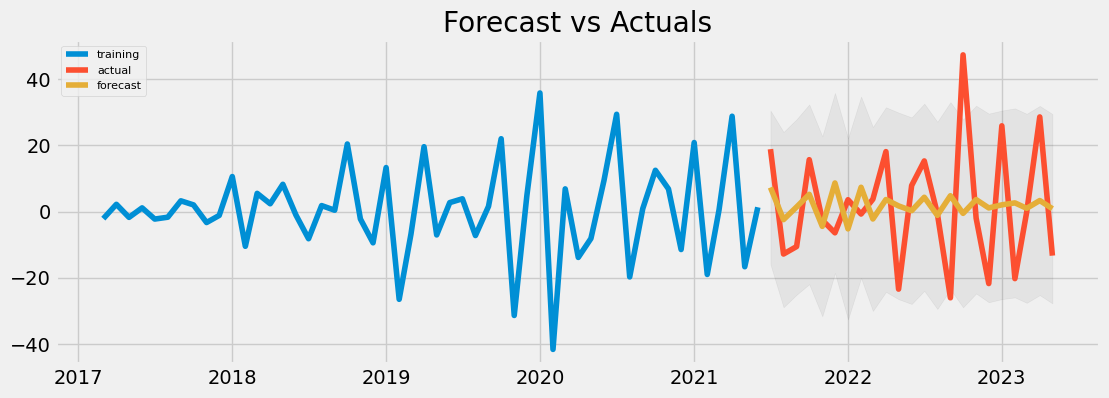

In [51]:
# Iteration 7 - change the q value
model = ARIMA(train, order=(2, 2, 6))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- The forecast is largely within the confidence intervals. ar.L1 and ar.L2 are statistically significant the ma values are not statistically significant.

                               SARIMAX Results                                
Dep. Variable:               EV Total   No. Observations:                   52
Model:                 ARIMA(2, 2, 7)   Log Likelihood                -193.467
Date:                Tue, 15 Aug 2023   AIC                            406.935
Time:                        17:24:47   BIC                            426.055
Sample:                    03-01-2017   HQIC                           414.216
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9087      0.205     -4.443      0.000      -1.310      -0.508
ar.L2         -0.9513      0.169     -5.623      0.000      -1.283      -0.620
ma.L1         -1.5704    157.211     -0.010      0.9

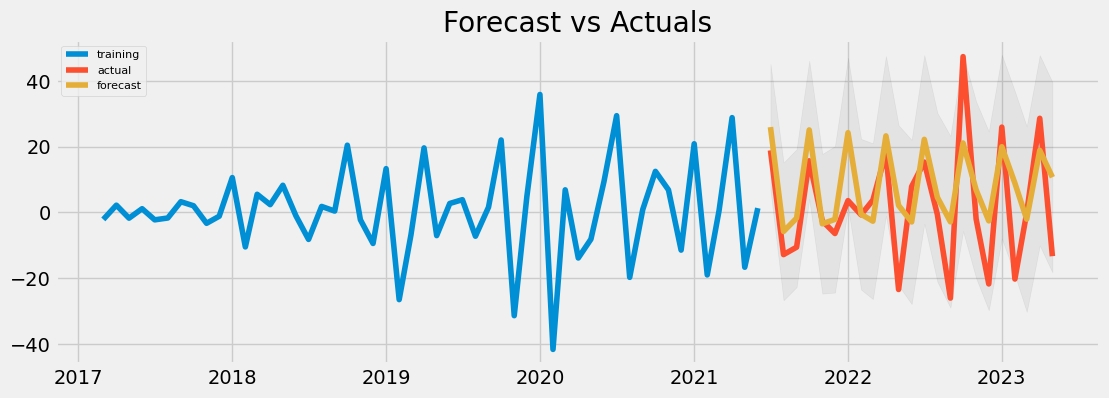

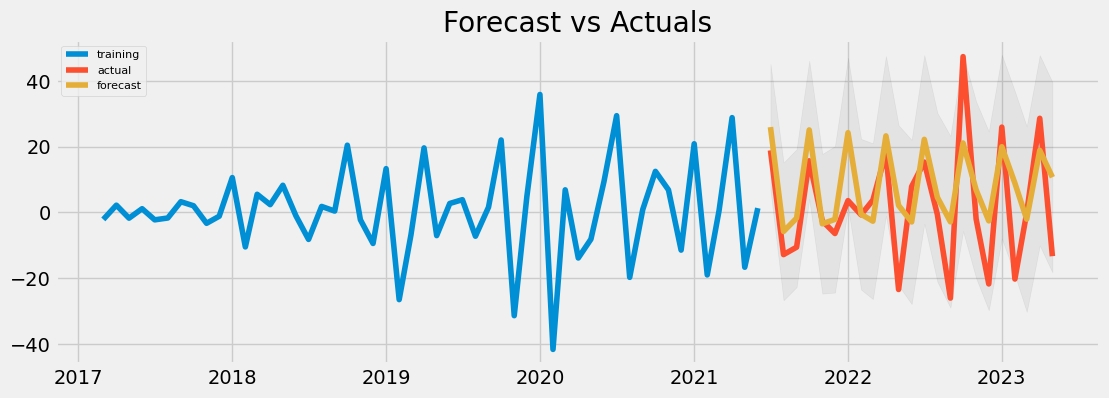

In [52]:
# Iteration 8 - change the q value
model = ARIMA(train, order=(2, 2, 7))   #p, d, q  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_result = fitted.get_forecast(steps=23, alpha=0.05)  # 95% confidence interval → alpha = 0.05; 23 is the shape of the test set
fc = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Get the confidence intervals

# Extract lower and upper bounds
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

 - The ar.L1 and ar.L2 variables are statistically significant but the ma values are not statistically significant, however there is improved overlap between the forecast and the actual data.

- Iteration 4 (order=(2, 2, 4)) seems to have the best fit for the data. Though the ma values are not statistically significant for p <=0.05, they are the lowest in that iteration and that iteration has the lowest AIC and BIC values. However the ARIMA model might not be the best model to employ in this case since the data has a seasonality component.